In [1]:
%matplotlib inline
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import pandas as pd

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from  tqdm import tqdm
import plotly.graph_objects as go

import contextlib

@contextlib.contextmanager
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    try:
        yield
    finally: 
        np.set_printoptions(**original)


In [2]:
import sys
sys.path.append("../../src/")

In [3]:
%load_ext autoreload
%autoreload 2

from qeview.qe_analyse_PM import qe_analyse_PM
import qeview.wannier_loader as wnldr 


In [4]:
Ang2Bohr = 1.8897259886
Bohr2Ang = 1./Ang2Bohr


# QE

In [19]:
calc = qe_analyse_PM('./', 'FeCl23D')

efermi 6.93
Unit Cell Volume:   64.1334  (Ang^3)
alat 6.4228
Reciprocal-Space Vectors cart (Ang^-1)
[[ 1.8467691455 -1.0662326633  0.327370275 ]
 [ 0.            2.1324653265  0.327370275 ]
 [-1.8467691455 -1.0662326633  0.327370275 ]]
Reciprocal-Space Vectors cart (2 pi / alat)
[[ 1.8877963546 -1.0899197335  0.3346430242]
 [ 0.            2.179839467   0.3346430242]
 [-1.8877963546 -1.0899197335  0.3346430242]]
Real-Space Vectors cart (Ang)
[[ 1.7011290563 -0.9821473186  6.3976336955]
 [ 0.            1.9642946371  6.3976336955]
 [-1.7011290563 -0.9821473186  6.3976336955]]
Real-Space Vectors cart (alat)
[[ 0.264859077  -0.1529164594  0.9960863047]
 [ 0.            0.3058329188  0.9960863047]
 [-0.264859077  -0.1529164594  0.9960863047]]


 positions cart (alat)
['Fe', 'Cl', 'Cl']
[[-0.           -0.           -0.          ]
 [ 0.           -0.            2.1814001212]
 [ 0.           -0.            0.8068587928]]
positions (frac or crystal)
[[-0.           -0.            0.          

In [20]:
_,_ = calc.get_qe_kpathBS(filename="kpath_qe2.dat", saveQ=True, points_per_unit=20)

G 0.00000000 0.00000000 0.00000000 0.00000000
. 0.05000000 0.05000000 0.05000000 0.05019645
. 0.10000000 0.10000000 0.10000000 0.10039291
. 0.15000000 0.15000000 0.15000000 0.15058936
. 0.20000000 0.20000000 0.20000000 0.20078581
. 0.25000000 0.25000000 0.25000000 0.25098227
. 0.30000000 0.30000000 0.30000000 0.30117872
. 0.35000000 0.35000000 0.35000000 0.35137518
. 0.40000000 0.40000000 0.40000000 0.40157163
. 0.45000000 0.45000000 0.45000000 0.45176808
T 0.50000000 0.50000000 0.50000000 0.50196454
. 0.51324731 0.48675269 0.50000000 0.55198097
. 0.52649461 0.47350539 0.50000000 0.60199741
. 0.53974192 0.46025808 0.50000000 0.65201385
. 0.55298923 0.44701077 0.50000000 0.70203028
. 0.56623654 0.43376346 0.50000000 0.75204672
. 0.57948384 0.42051616 0.50000000 0.80206316
. 0.59273115 0.40726885 0.50000000 0.85207959
. 0.60597846 0.39402154 0.50000000 0.90209603
. 0.61922577 0.38077423 0.50000000 0.95211247
. 0.63247307 0.36752693 0.50000000 1.00212890
. 0.64572038 0.35427962 0.50000000

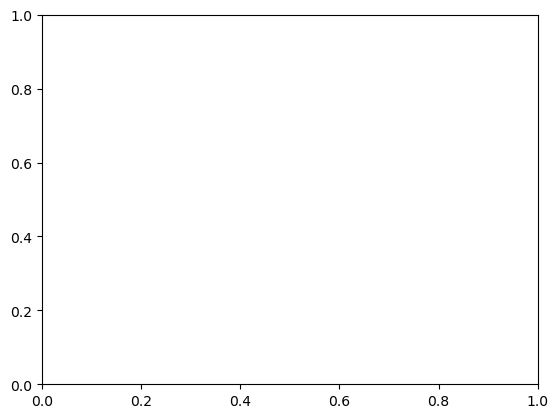

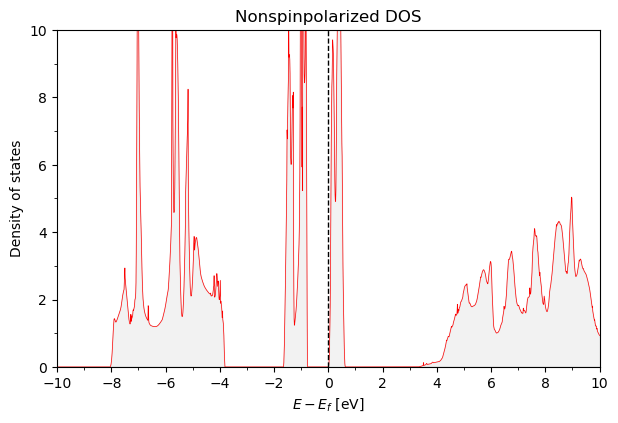

In [21]:
calc.plot_FullDOS(efrom=-10, eto=10)

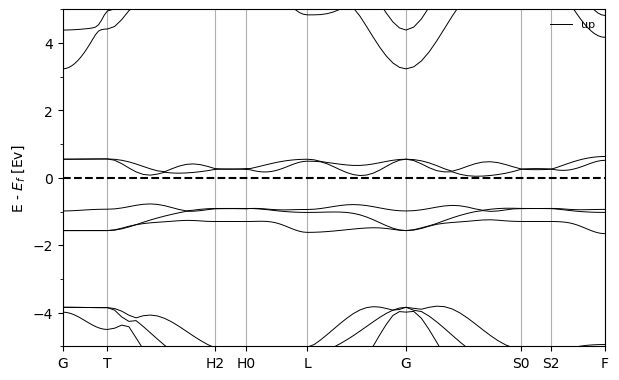

In [27]:
calc.plot_BS(efrom=-5, eto=5)

In [28]:
calc.print_bands_range(7, 20)

efermi 6.93
-------------BANDS---------------
band 8 eV from  -0.18 to  1.15                 eV-eF from  -7.10 to  -5.77
band 9 eV from  -0.06 to  1.46                 eV-eF from  -6.99 to  -5.47
band 10 eV from  1.13 to  2.96                 eV-eF from  -5.79 to  -3.96
band 11 eV from  1.45 to  3.08                 eV-eF from  -5.48 to  -3.84
band 12 eV from  1.83 to  3.12                 eV-eF from  -5.09 to  -3.81
band 13 eV from  5.27 to  5.68                 eV-eF from  -1.66 to  -1.25
band 14 eV from  5.36 to  6.02                 eV-eF from  -1.57 to  -0.91
band 15 eV from  5.94 to  6.15                 eV-eF from  -0.98 to  -0.77
band 16 eV from  6.97 to  7.49                 eV-eF from  0.05 to  0.56
band 17 eV from  7.11 to  7.56                 eV-eF from  0.18 to  0.63
band 18 eV from  10.16 to  12.84                 eV-eF from  3.23 to  5.91
band 19 eV from  11.31 to  13.99                 eV-eF from  4.39 to  7.07
band 20 eV from  12.07 to  14.61                 eV-eF fro

In [29]:
calc.get_pDOS()

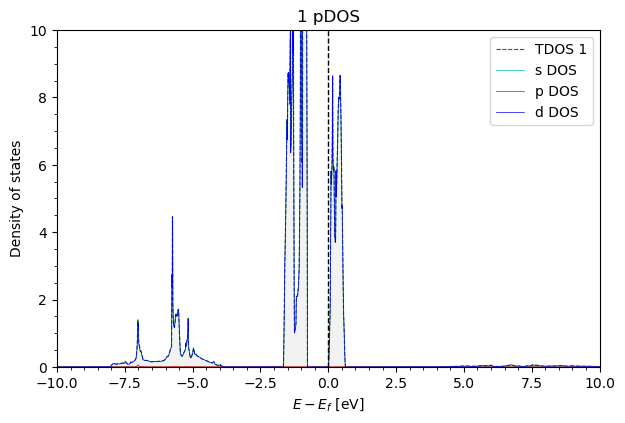

In [30]:
calc.plot_pDOS('1', efrom=-10, eto=10, yto=10)

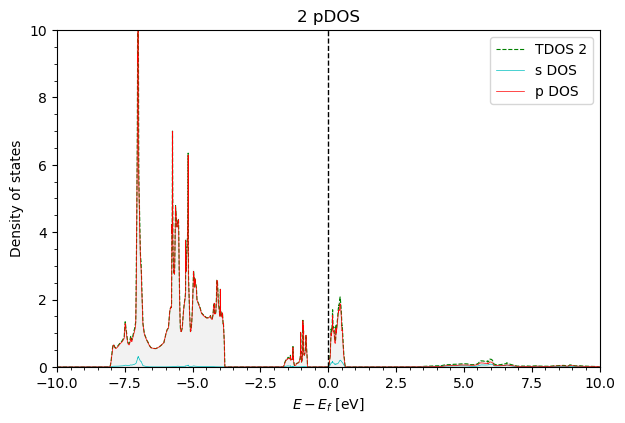

In [31]:
calc.plot_pDOS('2', efrom=-10, eto=10, yto=10)

# Wannier bands

In [33]:
calc.load_wannier(kpath_filename='kpath_qe2.dat', wannier_hr='FeCl2_hr.dat')

nwa  5
Rpts 4391
we have 3D hamiltonian


100%|██████████| 119/119 [00:02<00:00, 43.18it/s]


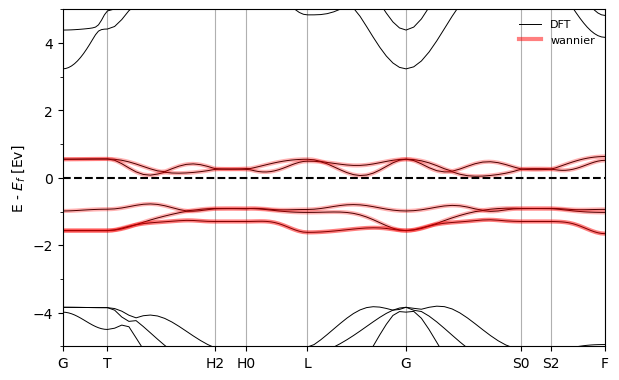

In [34]:
#interpolate the bands, on the plot bolds are interpolated wannier bands
calc.plot_wannier_BS(efrom=-5, eto=5)

In [37]:
#now we want to plot the wannier bands on several BZ (normally you don't need to do this)
# for 3D plot of isosurfaces 

loader = wnldr.Wannier_loader_PM('./', 'FeCl2_hr.dat')

acell = np.linalg.norm(calc.acell[0]) # AA
b1 = calc.bcell[0][:3] / (2. * np.pi / acell)  # First reciprocal lattice vector in units of 2pi/a
b2 = calc.bcell[1][:3] / (2. * np.pi / acell) # Second reciprocal lattice vector in units of 2pi/a
b3 = calc.bcell[2][:3] / (2. * np.pi / acell) # Third reciprocal lattice vector in units of 2pi/a


nwa  5
Rpts 4391
we have 3D hamiltonian


In [38]:
klim = 1.0 # want to have data in range [-1, 1] (in units of 2pi/a)
nkpt = 10

bs, _ = loader.get_dense_hk_symmetric(nkpt=nkpt, krange=klim, find_eigsQ=True)


100%|██████████| 8000/8000 [03:14<00:00, 41.19it/s]


In [39]:
band_str = bs[:,:,0] 

In [40]:


# k fractional
crystal_coords = np.mgrid[-klim:klim:1.0/nkpt, -klim:klim:1.0/nkpt, -klim:klim:1.0/nkpt].reshape(3,-1).T # repr cart in 2 pi / alat
crystal_coords = np.array(crystal_coords)
kx_cryst = crystal_coords[:, 0] 
ky_cryst = crystal_coords[:, 1] 
kz_cryst = crystal_coords[:, 2] 


B = np.array([b1, b2, b3]).T  # Reciprocal lattice basis

cart_coords = np.dot(crystal_coords, B.T) #np.dot(B, crystal_coords.T) 
# k cart (2 pi / alat)
kx_cart = cart_coords[:, 0] 
ky_cart = cart_coords[:, 1] 
kz_cart = cart_coords[:, 2] 


In [48]:

z = np.real(band_str[ 3, :] - calc.efermi ) # 3th band for example
print(np.min(z), np.max(z) ) # check that fermi level is in the middle of the band 

0.010464166457450297 0.560452231777461


In [49]:
from scipy.interpolate import Rbf


# Create the RBF interpolator
rbf = Rbf(kx_cart, ky_cart, kz_cart, z, function='linear')

# Interpolate the values on the regular grid
# here _cryst coords stand for regular meshes in cartesian coordinates just because grid is the same
bs_cart_grid = rbf(kx_cryst, ky_cryst, kz_cryst) 


In [50]:


def get_brillouin_zone_3d(cell):
    """
    Uses the k-space vectors and voronoi analysis to define
    the BZ of the system

    Args:
        cell: a 3x3 matrix defining the basis vectors in
        reciprocal space

    Returns:
        vor.vertices[bz_vertices]: vertices of BZ
        bz_ridges: edges of the BZ
        bz_facets: BZ facets

    """

    px, py, pz = np.tensordot(cell, np.mgrid[-1:2, -1:2, -1:2], axes=[0, 0])
    points = np.c_[px.ravel(), py.ravel(), pz.ravel()]

    from scipy.spatial import Voronoi

    vor = Voronoi(points)

    bz_facets = []
    bz_ridges = []
    bz_vertices = []

    for pid, rid in zip(vor.ridge_points, vor.ridge_vertices):

        if pid[0] == 13 or pid[1] == 13:
            bz_ridges.append(vor.vertices[np.r_[rid, [rid[0]]]])
            bz_facets.append(vor.vertices[rid])
            bz_vertices += rid

    bz_vertices = list(set(bz_vertices))

    return vor.vertices[bz_vertices], bz_ridges, bz_facets



In [51]:
vv = bs_cart_grid.flatten()

fig = go.Figure()

fig = go.Figure(data=go.Isosurface(
    x=kx_cryst,
    y=ky_cryst,
    z=kz_cryst,
    value=vv,
    isomin=0.2,
    isomax=0.4,
    # surface_count=5, # number of isosurfaces, 2 by default: only min and max
    caps=dict(x_show=False, y_show=False)
    ))


fig.add_trace(go.Scatter3d(
    x=[0, b1[0], b2[0], b3[0]],
    y=[0, b1[1], b2[1], b3[1]],
    z=[0, b1[2], b2[2], b3[2]],
    mode='markers+text',
    marker=dict(size=5),
    text=['Origin', 'b1', 'b2', 'b3'],
    textposition='top center'
))

# Add arrows for each basis vector
for b in [b1, b2, b3]:
    fig.add_trace(go.Scatter3d(
        x=[0, b[0]],
        y=[0, b[1]],
        z=[0, b[2]],
        mode='lines',
        line=dict(color='green', width=5),
        showlegend=False
    ))

vertices, ridges, _ = get_brillouin_zone_3d(calc.bcell/ (2. * np.pi / acell))

# Plot vertices
fig.add_trace(go.Scatter3d(
    x=vertices[:, 0], y=vertices[:, 1], z=vertices[:, 2],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Vertices',
    showlegend=False
))

# Plot edges
for ridge in ridges:
    # points = vertices[ridge]

    fig.add_trace(go.Scatter3d(
        x=ridge[:, 0], y=ridge[:, 1], z=ridge[:, 2],
        mode='lines',
        line=dict(color='black', width=2),
        name='Edges',
    showlegend=False
    ))

# Show figure
fig.update_layout(
    title='3D Brillouin Zone',
    scene=dict(
        xaxis_title='kx',
        yaxis_title='ky',
        zaxis_title='kz'
    )
)

fig.show()